In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [3]:
df.head(5)

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,695.0,Built Up area: 695 (64.57 sq.m.)Carpet area: 5...,2,2,2,...,NaN,695.0,595.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6493.0,1848.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,3,2,...,2250.0,NaN,1848.0,0,0,0,1,0,2,8
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up...,3,3,3+,...,2588.0,1900.0,NaN,1,0,0,0,0,1,23
3,sector 108,flat,sobha city,3.35,13266.0,2525.0,Super Built up area 2072.9(192.58 sq.m.),3,4,2,...,2072.9,NaN,NaN,0,0,0,0,0,1,102
4,sector 108,flat,sobha city,1.90,13758.0,1381.0,Super Built up area 1381(128.3 sq.m.),2,2,2,...,1381.0,NaN,NaN,0,0,0,0,0,1,85


In [4]:
df.isnull().sum()

sector                    0
property_type             0
society                   1
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                    0
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
servant room              0
study room                0
others                    0
pooja room                0
store room                0
furnishing_type           0
luxury_score              0
dtype: int64

In [5]:
df.duplicated().sum()

126

In [6]:
df.drop_duplicates(inplace = True)

## sector

In [8]:
df["sector"].value_counts().shape

(114,)

<Axes: xlabel='sector'>

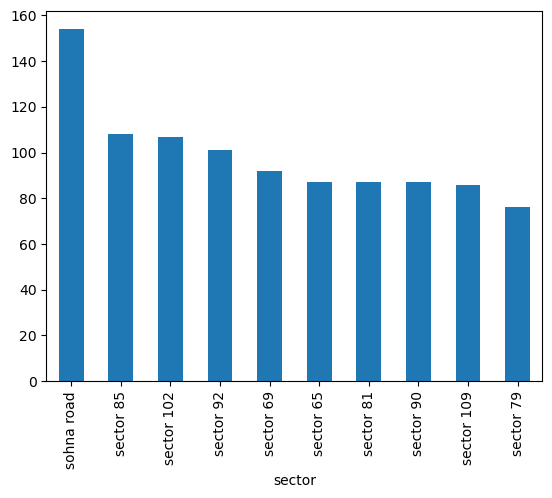

In [9]:
# Top 10 sectors
(df["sector"].value_counts()).head(10).plot(kind = "bar")

In [10]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 24,
 'Average (10-49)': 63,
 'Low (2-9)': 22,
 'Very Low (1)': 1}

## Observations
- There are a total of 114 unique sectors in the dataset.
- Frequency distribution of sectors:
  - Very High (>100): 3 sectors have more than 100 listings(property).
  - High (50-100): 25 sectors have between 50 to 100 listings.
  - Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
  - Low (2-9): 22 sectors have between 2 to 9 listings.
  - Very Low (1):  there is 1 sectors with only 1 listing.

## property_type

<Axes: xlabel='property_type'>

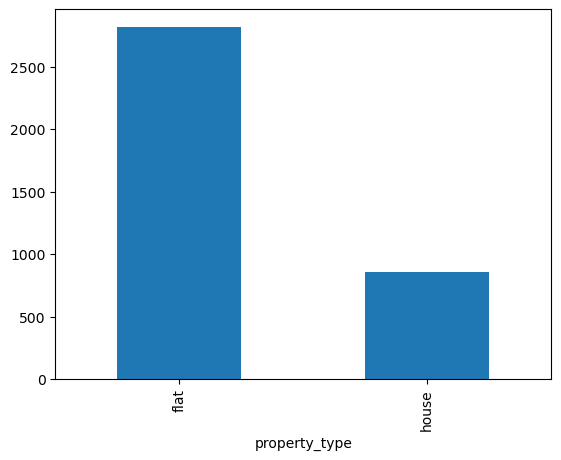

In [13]:
df["property_type"].value_counts().plot(kind="bar")

#### Observations
- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

## society

In [16]:
df["society"].isnull().sum()

1

In [17]:
df[df["society"].isnull()]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
530,sector 78,flat,NaN,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,0


In [18]:
 df["society"].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
adani brahma samsara                      1
sector 15 part 2 rwa                      1
unitech heritage city                     1
cancon enclave                            1
imt view society                          1
Name: count, Length: 676, dtype: int64

In [19]:
 df["society"].value_counts().shape

(676,)

In [20]:
(df[df["society"] != "independent"]).shape

(3191, 23)

In [21]:
(df[df["society"] == "independent"]).shape

(486, 23)

In [22]:
df[df["society"] != "independent"]['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
dlf the primus                          0.490282
ramsons kshitij                         0.494357
umang winter hills                      0.498433
unitech uniworld resorts                0.502194
mvn athens                              0.505956
Name: proportion, Length: 75, dtype: float64

In [23]:
df.shape

(3677, 23)

In [24]:
society_counts = df["society"].value_counts()

In [25]:
frequency_bins = ({
    "Very High (>100)" : (society_counts > 100).sum(),
    "High (50-100)" : ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Avg (10-49)" : ((society_counts >= 10 ) & (society_counts >= 49)).sum(),
    "Low (2-9)" : ((society_counts > 1) & (society_counts < 10 )).sum(),
    "Very Low(1)" : (society_counts == 1) .sum()
    })
frequency_bins
    
    

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Avg (10-49)': 3,
 'Low (2-9)': 273,
 'Very Low(1)': 308}

<Axes: xlabel='society'>

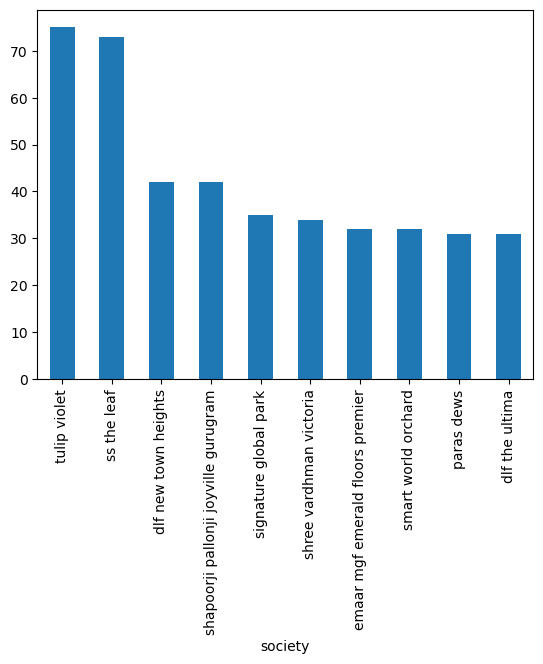

In [26]:
# top 10 socities
(df[df["society"] != "independent"])["society"].value_counts().head(10).plot(kind="bar")

#### observation
- this colm is also a catgorical it tell us about the appartments of the flat
- The problem is, it is high cardinality column ( means too many category)

- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
   - Very High (>100): Only 1 society has more than 100 listings.
   - High (50-100): 2 societies have between 50 to 100 listings.
   - (10-49): 92 societies fall in this range with 10 to 49 listings each.
   - Low (2-9): 273 societies have between 2 to 9 listings.
   - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

## price

In [29]:
df["price"].isnull().sum()

17

In [30]:
df["price"].describe()
# since the mean is 2..53 crore
# and the meadian if i.52 crore , this is the clear sign of outliers

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [31]:
plt.rcParams["figure.figsize"] = (5, 3)

<Axes: xlabel='price', ylabel='Count'>

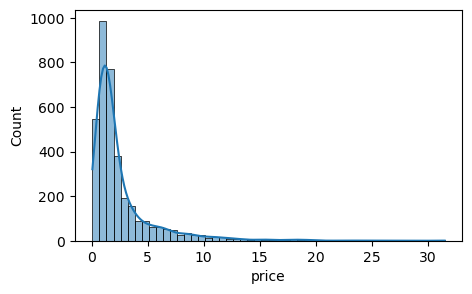

In [32]:
sns.histplot(df["price"],kde=True,bins = 50)  
# this is right skewed data. The lots of properties have low prices but their are some properties which has very high prices

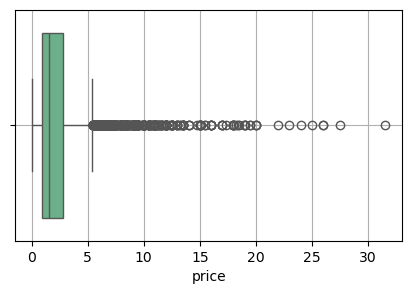

In [33]:
sns.boxplot(x = df["price"],color="#60bb86")
plt.grid()

In [34]:
# It captures the middle 50% of your data (the “bulk”).
# The smaller the IQR, the tighter (more packed) your data is around the center.
# The larger the IQR, the more spread out the middle values are.

## Descriptive Statistics:
- Count: There are 3,660 non-missing price entries.
- Mean Price: The average price is approximately 2.53 crores.
- Median Price: The median (or 50th percentile) price is 1.52 crores.
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
- Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
## Visualizations:
- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- Missing Values: There are 17 missing values in the price column.

In [36]:
skewness = df["price"].skew()
kurtosis = df["price"].kurtosis()
print(skewness, kurtosis)

3.2791704733134623 14.933372629214254


- Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

- Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution

In [38]:
quantiles = df["price"].quantile([0.01,0.05,0.95,0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

#### Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [40]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3 - Q1
IQR

1.8

In [41]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-1.7500000000000002, 5.45)

In [42]:
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
outliers.shape

(425, 23)

In [43]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

#### Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

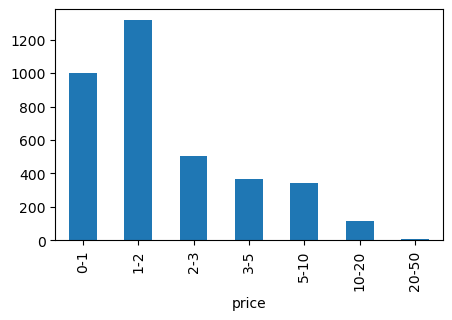

In [45]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

In [46]:
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index()

price
0-1      1002
1-2      1315
2-3       504
3-5       368
5-10      342
10-20     118
20-50      11
Name: count, dtype: int64

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

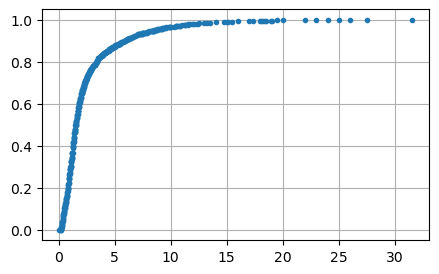

In [48]:
# An Empirical Cumulative Distribution Function (ECDF) shows the proportion of data points less than or equal to a given value.
# On the x-axis → the values (price).
# On the y-axis → cumulative proportion of data up to that value (between 0 and 1).
# 👉 “By this price, how much fraction of my data is covered?”

# ecdf plot
ecdf = df['price'].value_counts(normalize = True).sort_index().cumsum() 
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

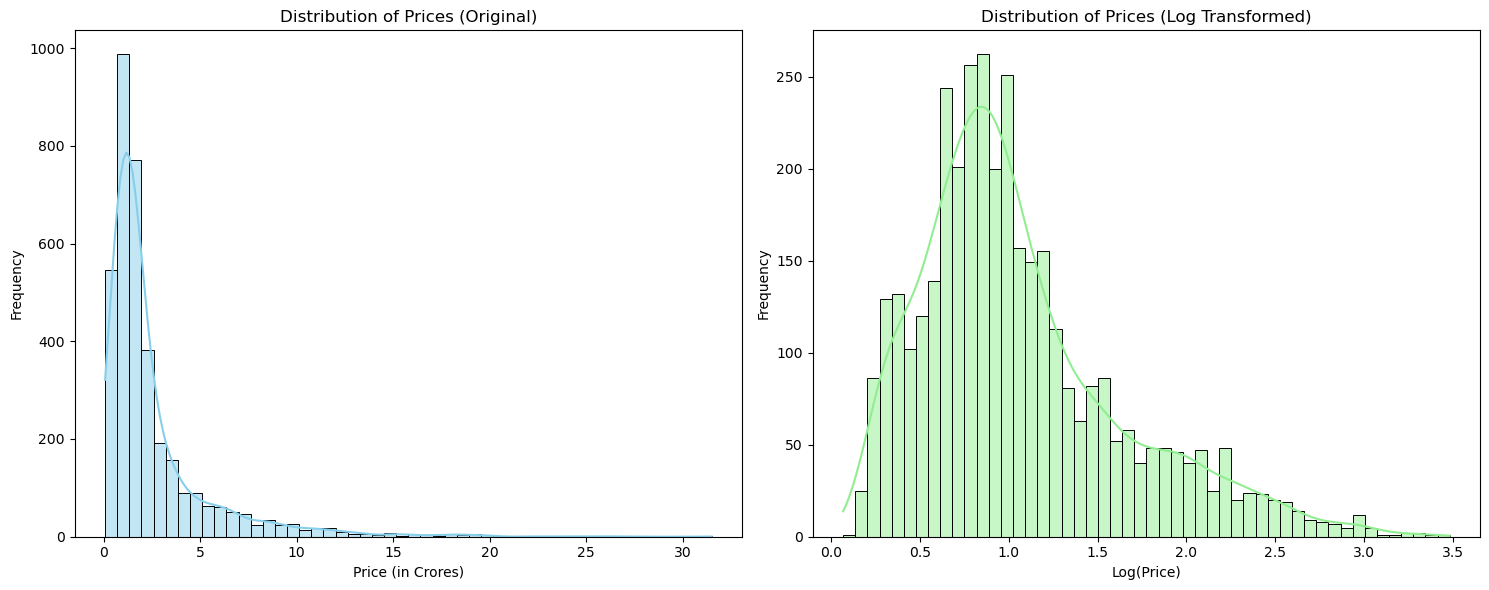

In [49]:
# if you have the right skewed data then to convert it into the normal distribution we apply the log transformation
# the statistical algorithms like LR algo that rely on the statistics , if you want to improve the result of such algos the 
# we can apply the log trnsformation on output column

plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

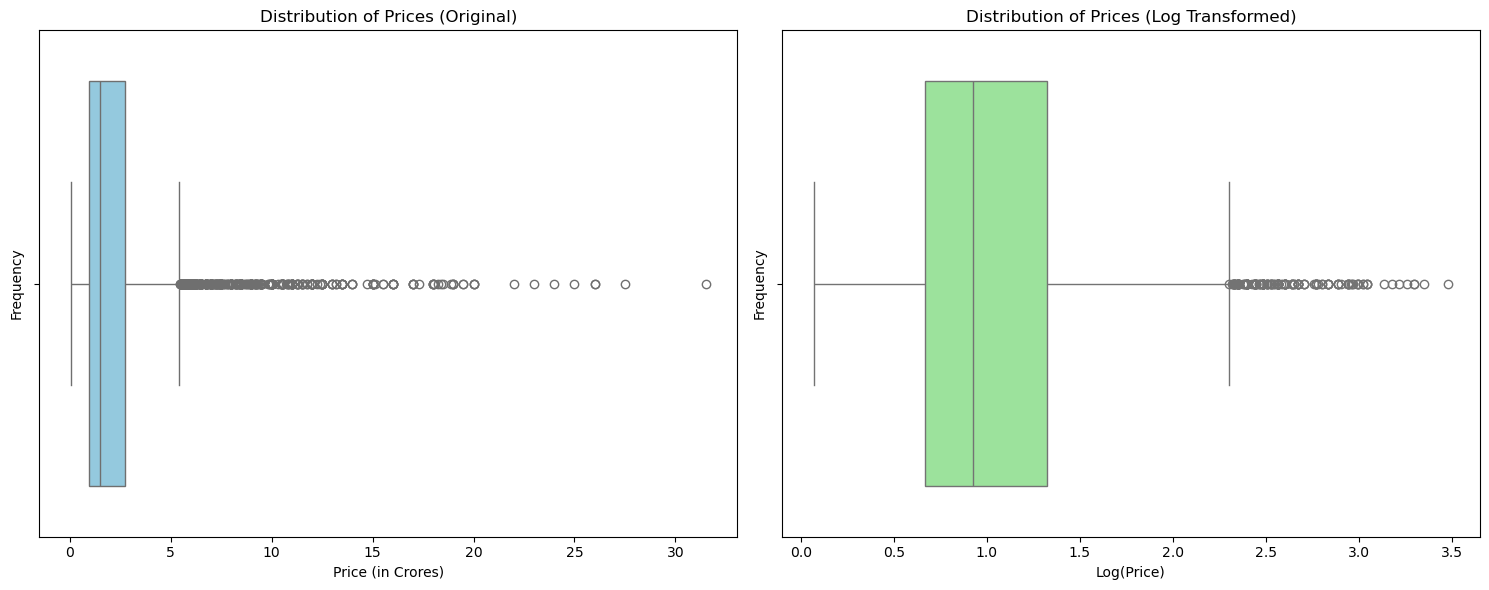

In [51]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## price_per_sqft

In [53]:
df["price_per_sqft"].isnull().sum()

17

In [54]:
df["price_per_sqft"].describe()

# the mean price_per_sqft is 13,892 , and the meadian  price_per_sqft is 6817 this is the clear sign of outliers
# the minimum price_per_sqft is 4 and this not possible also the maximum price_per_sqft is 600000 it also crazy not possible

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

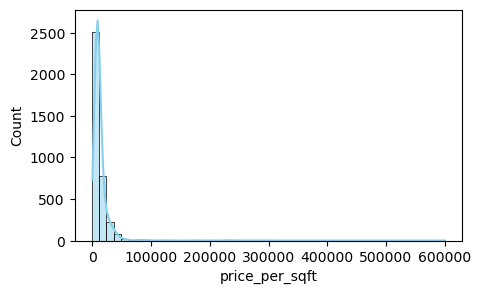

In [55]:
sns.histplot(df["price_per_sqft"],kde = True, bins = 50,color = "skyblue")

# this is also right skewed data after plotting the histogram

<Axes: xlabel='price_per_sqft'>

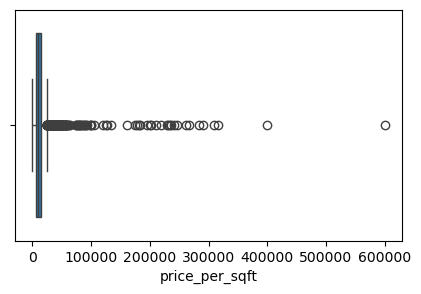

In [56]:
sns.boxplot(x=df["price_per_sqft"])

- The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many - - data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations
- Potential Outliers
- Right Skewed
- 17 missing values

## area

## bedRoom

In [60]:
df["bedRoom"].isnull().sum()

0

<Axes: xlabel='bedRoom'>

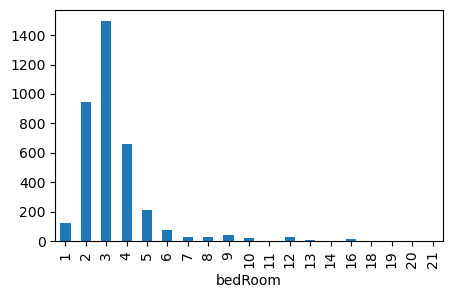

In [61]:
df["bedRoom"].value_counts().sort_index().plot(kind = "bar")

<Axes: xlabel='count'>

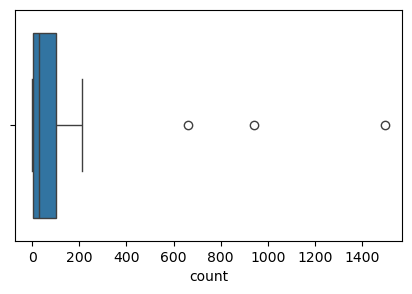

In [62]:
sns.boxplot(x=df["bedRoom"].value_counts().sort_index())

<Axes: ylabel='proportion'>

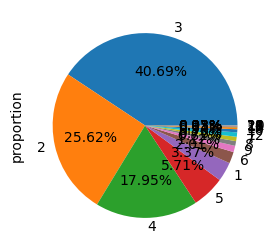

In [63]:
df['bedRoom'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

## balcony

In [65]:
df["balcony"][3]

'2'

In [66]:
df["balcony"].isnull().sum()

0

<Axes: xlabel='balcony'>

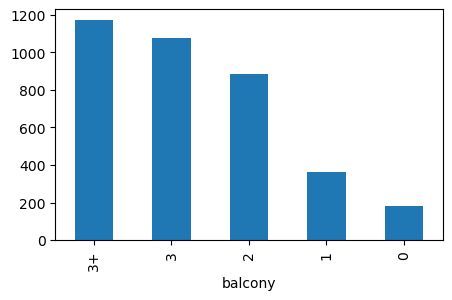

In [67]:
df["balcony"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

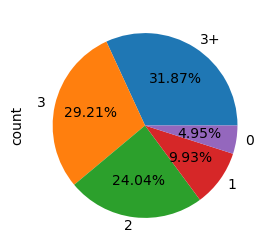

In [68]:
df["balcony"].value_counts().plot(kind = "pie",autopct = "%0.2f%%")

## bathroom

In [70]:
df["bathroom"].isnull().sum()

0

<Axes: xlabel='bathroom'>

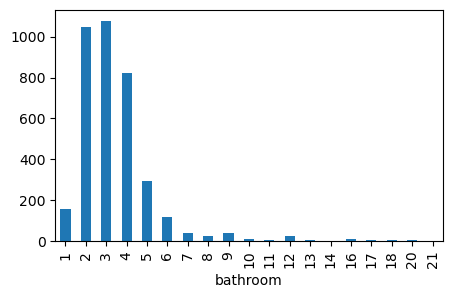

In [77]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='count'>

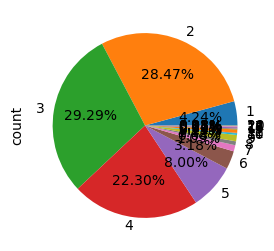

In [79]:
df["bathroom"].value_counts().sort_index().plot(kind = "pie",autopct= "%0.2f%%")

In [81]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,695.0,Built Up area: 695 (64.57 sq.m.)Carpet area: 5...,2,2,2,...,NaN,695.0,595.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6493.0,1848.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,3,2,...,2250.0,NaN,1848.0,0,0,0,1,0,2,8
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up...,3,3,3+,...,2588.0,1900.0,NaN,1,0,0,0,0,1,23
3,sector 108,flat,sobha city,3.35,13266.0,2525.0,Super Built up area 2072.9(192.58 sq.m.),3,4,2,...,2072.9,NaN,NaN,0,0,0,0,0,1,102
4,sector 108,flat,sobha city,1.90,13758.0,1381.0,Super Built up area 1381(128.3 sq.m.),2,2,2,...,1381.0,NaN,NaN,0,0,0,0,0,1,85


In [83]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,19.0,North,Undefined,NaN,695.0,595.0,0,0,0,0,0,1,0
1,8.0,Na,Moderately New Property,2250.0,NaN,1848.0,0,0,0,1,0,2,8
2,8.0,East,Moderately New Property,2588.0,1900.0,NaN,1,0,0,0,0,1,23
3,19.0,Na,New Property,2072.9,NaN,NaN,0,0,0,0,0,1,102
4,8.0,East,Relatively new property,1381.0,NaN,NaN,0,0,0,0,0,1,85


## floorNum

In [88]:
df["floorNum"].isnull().sum()

19

In [102]:
df["floorNum"].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

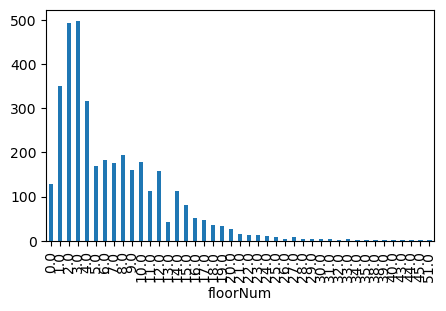

In [104]:
df["floorNum"].value_counts().sort_index().plot(kind = "bar",rot = 90)

<Axes: xlabel='floorNum'>

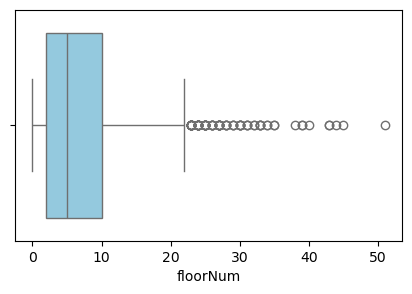

In [110]:
sns.boxplot(x=df["floorNum"],color = "skyblue")

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

## facing

In [139]:
df["facing"].isnull().sum()

0

In [141]:
df["facing"].value_counts()

facing
Na            1045
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

## agePossession

In [123]:
df["agePossession"].value_counts()

agePossession
Relatively new property    1646
New Property                593
Moderately New Property     563
Undefined                   306
Old Property                303
Under Construction          266
Name: count, dtype: int64

In [143]:
df["agePossession"].isnull().sum()

0

In [129]:
df["agePossession"] = df["agePossession"].str.replace("Moderately New Property","Moderately Old")

## areas

#### 1. super_built_up_area

In [ ]:
## super_built_up_area

In [148]:
df["super_built_up_area"].isnull().sum()

1802

In [152]:
df["super_built_up_area"].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [172]:
df[df["super_built_up_area"] >5000]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
15,gwal pahari,flat,.,7.00,11000.0,6364.0,Super Built up area 6000(557.42 sq.m.),4,4,3+,...,6000.0,NaN,NaN,1,0,0,0,0,1,52
636,gwal pahari,flat,krrish provence estate,5.50,9482.0,5800.0,Super Built up area 5800(538.84 sq.m.),4,5,3+,...,5800.0,NaN,NaN,1,1,0,1,0,1,151
983,sector 81,flat,bestech park view grand spa,4.70,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,1,0,0,0,0,0,140
1220,gwal pahari,flat,krrish provence estate,5.25,9051.0,5800.0,Super Built up area 5800(538.84 sq.m.),4,5,3+,...,5800.0,NaN,NaN,1,1,0,1,0,1,49
1285,sector 108,flat,raheja vedas,2.15,4134.0,5201.0,Super Built up area 5200(483.1 sq.m.)Built Up ...,3,4,3+,...,5200.0,4600.0,4000.0,0,1,0,0,0,1,0
1323,sector 43,flat,beverley park 1,8.44,16230.0,5200.0,Super Built up area 5200(483.1 sq.m.)Built Up ...,4,5,3,...,5200.0,5000.0,4900.0,1,0,0,0,0,2,117
2085,sector 62,flat,pioneer araya,10.75,19500.0,5513.0,Super Built up area 5514(512.27 sq.m.),5,7,3,...,5514.0,NaN,NaN,1,0,0,0,0,0,153
3493,gwal pahari,flat,paras quartier,5.90,11028.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,...,5350.0,NaN,NaN,1,1,0,1,1,0,160
3671,gwal pahari,flat,paras quartier,7.50,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,...,5350.0,NaN,NaN,1,0,1,1,0,0,49
3725,gwal pahari,flat,krrish provence estate,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,1,0,1,1,0,1,49


<Axes: xlabel='super_built_up_area', ylabel='Count'>

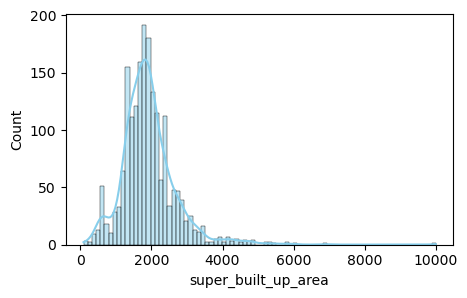

In [154]:
sns.histplot(df["super_built_up_area"].dropna(),kde = True, color = "skyblue")

<Axes: xlabel='super_built_up_area'>

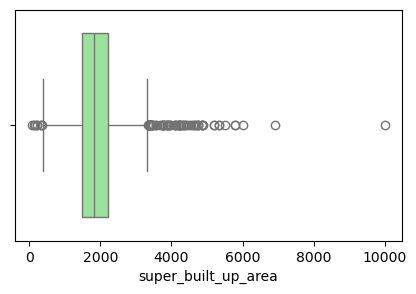

In [160]:
sns.boxplot(x = df["super_built_up_area"].dropna(), color = "lightgreen")

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

#### 2. built_up_area

In [162]:
# built_up_area
df["built_up_area"].isnull().sum()

1987

In [164]:
df["built_up_area"].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

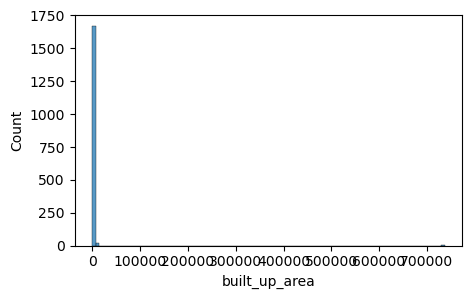

In [182]:
sns.histplot(df["built_up_area"].dropna(),kde = False,bins = 100)

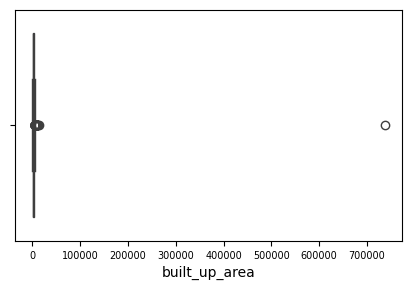

In [205]:
sns.boxplot(x= df["built_up_area"] .dropna())
plt.xticks(fontsize=7)
plt.show()

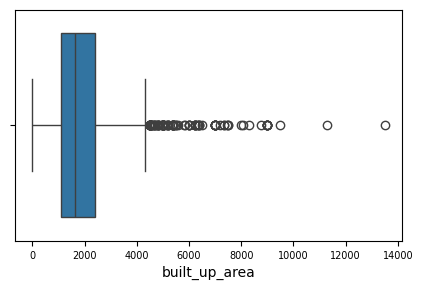

In [203]:
sns.boxplot(x= df[df["built_up_area"] < 60000]["built_up_area"].dropna())
plt.xticks(fontsize=7)
plt.show()

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

### 3. carpet_area

In [225]:
df["carpet_area"].isnull().sum()

1805

In [227]:
df["carpet_area"].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area'>

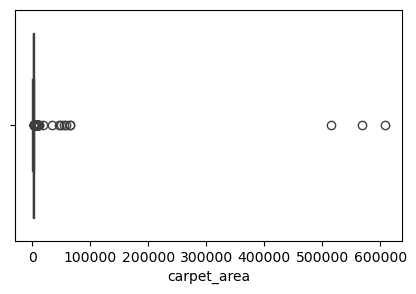

In [229]:
sns.boxplot(x = df["carpet_area"].dropna())

<Axes: xlabel='carpet_area', ylabel='Count'>

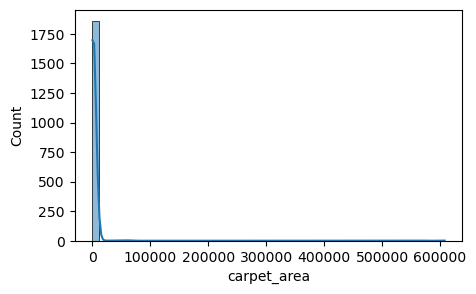

In [233]:
sns.histplot(x = df["carpet_area"].dropna(),kde = True,bins = 50)

In [235]:
df.iloc[:,16:]

,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,0,0,0,0,0,1,0
1,0,0,0,1,0,2,8
2,1,0,0,0,0,1,23
3,0,0,0,0,0,1,102
4,0,0,0,0,0,1,85
...,...,...,...,...,...,...,...
3798,1,0,0,0,0,1,169
3799,0,0,0,0,0,1,57
3800,0,0,0,0,1,1,60
3801,0,0,0,1,0,1,72


## additional rooms

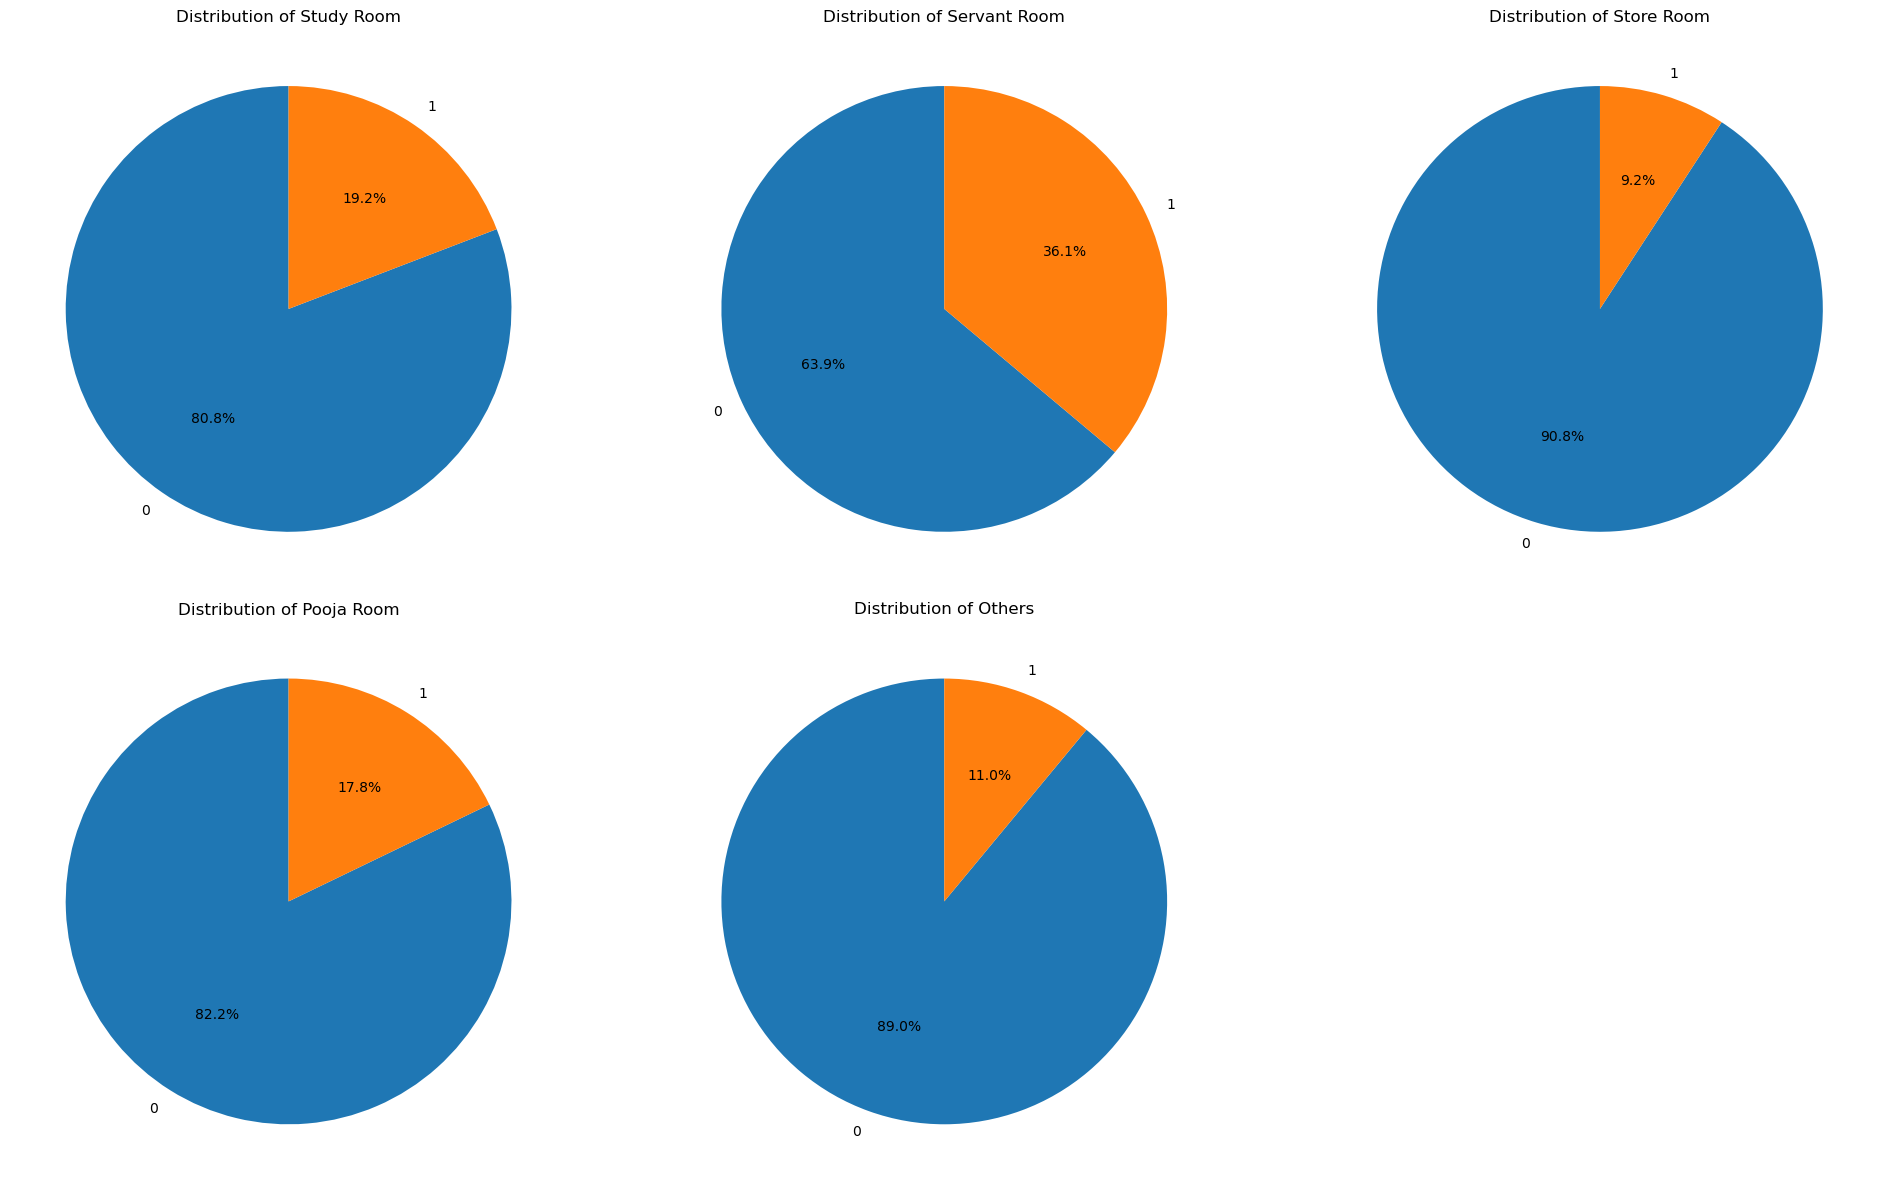

In [240]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## furnishing_type

In [243]:
df["furnishing_type"].isnull().sum()

0

<Axes: ylabel='count'>

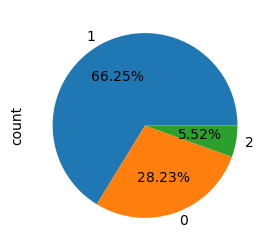

In [247]:
df["furnishing_type"].value_counts().plot(kind = "pie",autopct = "%0.2f%%")

## luxury_score

In [250]:
df["luxury_score"].isnull().sum()

0

In [258]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

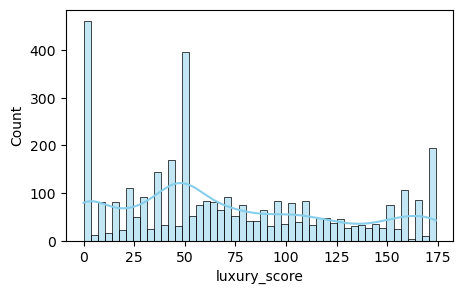

In [256]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

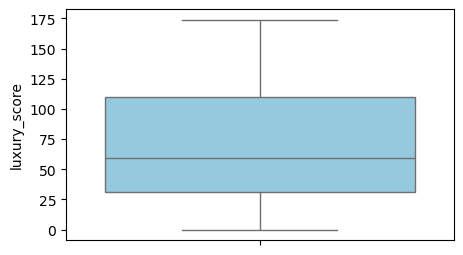

In [261]:
sns.boxplot(x = df['luxury_score'], color='skyblue')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [263]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,695.0,Built Up area: 695 (64.57 sq.m.)Carpet area: 5...,2,2,2,...,NaN,695.0,595.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6493.0,1848.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,3,2,...,2250.0,NaN,1848.0,0,0,0,1,0,2,8
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up...,3,3,3+,...,2588.0,1900.0,NaN,1,0,0,0,0,1,23
3,sector 108,flat,sobha city,3.35,13266.0,2525.0,Super Built up area 2072.9(192.58 sq.m.),3,4,2,...,2072.9,NaN,NaN,0,0,0,0,0,1,102
4,sector 108,flat,sobha city,1.90,13758.0,1381.0,Super Built up area 1381(128.3 sq.m.),2,2,2,...,1381.0,NaN,NaN,0,0,0,0,0,1,85
